# 期中练习

## 要求

检验对上半学期知识的掌握，课后自行完成，可查阅各种资料。

### 如何提交

- 复制本文件，文件名改为`教学班号-编号.ipynb`。例如刘国强同学是2班第15号，文件名应改为`2-15.ipynb`。
- 在复制文件中答题，每道题的答案紧接题目。
- 答题结束后commit该文件，并提交pull request。



In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 练习1

为了分析自变量$x$和因变量$y$的关系，通过测量得到带误差的20个样本数据如下所示

In [2]:
X = np.array([ 0.70846042, -0.68388789,  1.03780474,  1.08334621,  0.77026309,
        0.19722004, -0.46819526, -0.45270204,  0.02362673,  0.06549472,
        0.08898416,  0.59424455, -0.26400365,  0.2456922 ,  0.5114847 ,
       -0.31604016, -1.49329364,  1.24112288,  1.01993764,  1.75634392])

In [3]:
Y = np.array([ 4.49682518,  3.5737603 ,  7.93568197,  3.58719009,  5.38341441,
        5.47930021, -0.9861325 , -0.15686681,  2.36963799,  4.01600211,
       -0.20329642,  3.07728831, -1.30408343,  2.84796441,  2.27915787,
        2.62078689, -1.2855133 ,  4.39242028,  6.24385669,  6.00822241])

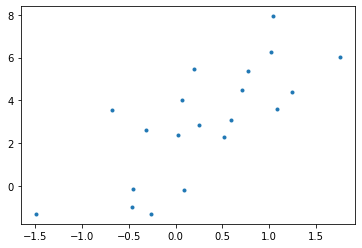

In [4]:
plt.plot(X, Y, ".")

### 1.1 划分训练集和测试集

将20个数据点划分为训练集和测试集，期中训练集为前15个数据点，测试集为后5个。

In [5]:
# 划分训练集和测试集
X_train, Y_train = X[:15], Y[:15]
X_test, Y_test = X[15:], Y[15:]

print("训练集X:", X_train)
print("训练集Y:", Y_train)
print("测试集X:", X_test)
print("测试集Y:", Y_test)

训练集X: [ 0.70846042 -0.68388789  1.03780474  1.08334621  0.77026309  0.19722004
 -0.46819526 -0.45270204  0.02362673  0.06549472  0.08898416  0.59424455
 -0.26400365  0.2456922   0.5114847 ]
训练集Y: [ 4.49682518  3.5737603   7.93568197  3.58719009  5.38341441  5.47930021
 -0.9861325  -0.15686681  2.36963799  4.01600211 -0.20329642  3.07728831
 -1.30408343  2.84796441  2.27915787]
测试集X: [-0.31604016 -1.49329364  1.24112288  1.01993764  1.75634392]
测试集Y: [ 2.62078689 -1.2855133   4.39242028  6.24385669  6.00822241]


### 1.2 数据建模

分别用1到4次多项式函数作为模型拟合训练集中的数据，并分别计算每个模型与数据的均方差（MSE）。

哪一个模型与训练数据拟合最好？

In [6]:
# 定义多项式次数列表
degree_list = [1, 2, 3, 4]

# 计算每个模型的均方差（MSE）
for degree in degree_list:
    
    # 拟合多项式回归模型
    p = np.polyfit(X_train, Y_train, degree)
    
    # 计算训练集上的预测值
    Y_pred_train = np.polyval(p, X_train)

    # 计算MSE
    mse_train = np.mean((Y_pred_train - Y_train) ** 2)
    
    print("degree = {}: MSE_train = {}".format(degree, mse_train))

degree = 1: MSE_train = 3.6141199809365916
degree = 2: MSE_train = 3.4709875708912987
degree = 3: MSE_train = 3.0102468155333737
degree = 4: MSE_train = 2.397166165471182


较低的MSE表示模型与训练数据拟合得更好。因此，在给定的结果中，degree = 4 的模型具有最低的MSE（2.397166165471182），表明它与训练数据拟合得最好。

### 1.3 模型测试
计算4个模型与测试数据的均方差，哪一个模型与测试数据拟合最好？

In [7]:
# 定义多项式次数列表
degree_list = [1, 2, 3, 4]
# 计算每个模型的均方差（MSE）
for degree in degree_list:
    
    # 拟合多项式回归模型
    p = np.polyfit(X_train, Y_train, degree)
    
    # 计算测试集上的预测值
    Y_pred_test = np.polyval(p, X_test)

    # 计算MSE
    mse_test = np.mean((Y_pred_test - Y_test) ** 2)
    
    print("degree = {}: MSE_test = {}".format(degree, mse_test)) 

degree = 1: MSE_test = 1.9373288022689124
degree = 2: MSE_test = 6.924885916261641
degree = 3: MSE_test = 145.53829178692047
degree = 4: MSE_test = 2717.4997768004628


较低的MSE表示模型与测试数据拟合得更好。因此，在给定的结果中，degree = 1 的模型具有最低的MSE（1.9373288022689124），表明它与测试数据拟合得最好。

1.2和1.3的答案是否相同？两者的异同有什么意义？

答案不相同。根据给出的均方误差（Mean Squared Error, MSE）的结果，degree = 4 的模型在训练数据上拟合得更好，而degree = 1 的模型在测试数据上拟合得更好。

这种情况表示degree = 4 的模型过拟合了训练数据，即在训练数据上表现出色，但在未见过的测试数据上表现较差。与之相反，degree = 1 的模型在测试数据上表现较好，可能更好地泛化到未见过的数据。

这种差异的意义在于，我们希望训练出的模型能够在未见过的数据上具有良好的泛化能力。如果模型在训练数据上表现很好，但在测试数据上表现差，说明模型可能过拟合了训练数据，没有很好地捕捉数据的一般规律。因此，需要注意模型的选择和调优，以避免过拟合问题，从而在真实应用中获得更好的性能。

## 练习2 人工神经网络

有如下神经网络：
- 输入$x$是2维向量，输出$y$是1维标量
- 包含两个全连接层
    - 第一层有5个神经元，激活函数为sigmoid
    - 第二层有1个神经元，激活函数为relu
- 损失函数为均方差MSE

### 2.1 写出公式

- 写出relu、sigmoid函数的公式
- 写出整个神经网络的公式

sigmoid函数的公式：
sigmoid(x) = 1 / (1 + exp(-x))

relu函数的公式： relu(x) = max(0, x)

整个神经网络的公式：

Z1 = X.dot(W1) + B1

A1 = sigmoid(Z1)

Z2 = A1.dot(W2) + B2

Y_pred = relu(Z2)

损失函数（均方差）的公式： L = (1/n) * sum((Y - Y_pred)^2)

其中， X：输入数据（2维向量）

Y：输出数据（1维标量）

W1：第一层的权重参数（2x5矩阵）

B1：第一层的偏置参数（5维向量）

W2：第二层的权重参数（5x1矩阵）

B2：第二层的偏置参数（1维标量）

n：数据点的数量

### 2.2 正向传播

假设已知4个数据点的输入'X'，参考输出'Y'，参数'W_1'、'B_1'、'W_2'、'B_2'，。

- 正向传播计算输出预测值'Y_pred'
- 计算损失值'L'


In [8]:
X = np.array([[-0.05025071,  1.12345037],
       [-1.2771336 , -0.03387919],
       [-0.06085093,  0.83960333],
       [ 0.26666122, -0.15723225]])

注意，这里输入'x'表示为行向量，即'X'中每行表示一个数据点。

In [9]:
Y = np.array([[ 0.34942997],
       [ 0.09796396],
       [ 1.80617515],
       [-0.50698293]])

In [10]:
W1 = np.random.randn(2,5)
b1 = np.random.randn(5)
W2 = np.random.randn(5,1)
b2 = np.random.randn(1,1)

In [11]:
W1 = np.array([[-0.15772071,  2.4169384 ,  1.18656177,  0.74048303,  0.95473468],
       [ 1.75613621,  0.44768404,  0.25003215,  0.52863169, -0.75204543]])

In [12]:
b1 = np.array([-1.00393578, -0.19942106, -1.23939537,  1.62336519, -0.21580562])

In [13]:
W2 = np.array([[ 0.8173788 ],
       [-0.01165333],
       [ 1.10703394],
       [ 0.90372372],
       [ 0.86510315]])

In [14]:
b2 = np.array([[0.277288]])

In [15]:
# 正向传播计算输出预测值 Y_pred
Z1 = X.dot(W1) + b1
A1 = 1 / (1 + np.exp(-Z1))
Z2 = A1.dot(W2) + b2
Y_pred = np.maximum(0, Z2)

# 计算损失值 L
n = len(X)
L = (1/n) * np.sum((Y - Y_pred)**2)

Y_pred, L

(array([[2.18514844],
        [1.35081552],
        [2.09965131],
        [1.98338406]]),
 2.80688883177308)

### 2.3 方向传播

计算损失值'L'对参数'W_1'、'B_1'、'W_2'、'B_2'的偏导数。

In [16]:
# 反向传播计算损失值 L 对参数 W1, b1, W2, b2 的偏导数

dL_dY_pred = 2/n * (Y_pred - Y)
dL_dZ2 = dL_dY_pred * (Z2 > 0)
dL_dW2 = np.dot(A1.T, dL_dZ2)
dL_db2 = np.sum(dL_dZ2, axis=0)
dL_dA1 = np.dot(dL_dZ2, W2.T)
dL_dZ1 = dL_dA1 * A1 * (1 - A1)
dL_dW1 = np.dot(X.T, dL_dZ1)
dL_db1 = np.sum(dL_dZ1, axis=0)

dL_dW1, dL_db1, dL_dW2, dL_db2

(array([[-0.10062818, -0.00045547,  0.01227741, -0.12888547, -0.04684264],
        [ 0.16104007, -0.00277893,  0.20342634,  0.06970365,  0.14329457]]),
 array([ 0.45340951, -0.00683274,  0.54292804,  0.35971905,  0.52730517]),
 array([[1.20554195],
        [1.33518175],
        [0.66155887],
        [2.42607152],
        [1.0643283 ]]),
 array([2.93620659]))